In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
WIDTH = 3
WIDTH_2 = 0.5

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Chart for simulations' results

In [94]:
# Upload and prepare data
data = pd.read_csv("results/simulations/results-ax-ac-n-DL.csv", decimal=",", header=None)
#data = pd.read_csv("results/simulations/results-ax-ac-n-DLUL.csv", decimal=",", header=None)
#data = pd.read_csv("results/simulations/ns3-komondor.csv", decimal=",", header=None)
data = data.transpose()
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header
data = data.astype("double").set_index(['# STAS'])
print(data)

0       802.11ax  802.11ac  802.11n
# STAS                             
1.0       113.01    116.39   116.63
3.0       113.00    115.91   116.82
6.0       113.09    117.15   117.24
9.0       111.13    105.49   114.88
12.0      112.70    116.13   116.25
15.0      102.43    113.88   113.40
18.0      111.01    106.75   105.20
21.0       98.58    103.12    94.93
24.0      102.20    100.42    99.31
27.0      106.44     97.40    98.26
30.0       91.18     93.23   103.18
33.0       88.57     93.62    91.28
36.0       97.48     96.20    90.97
39.0      100.34    101.17    95.08
42.0       82.40     83.11    96.04
45.0       84.66     86.47    95.09
48.0       85.45     83.64    92.74
51.0       79.98     82.83    91.81


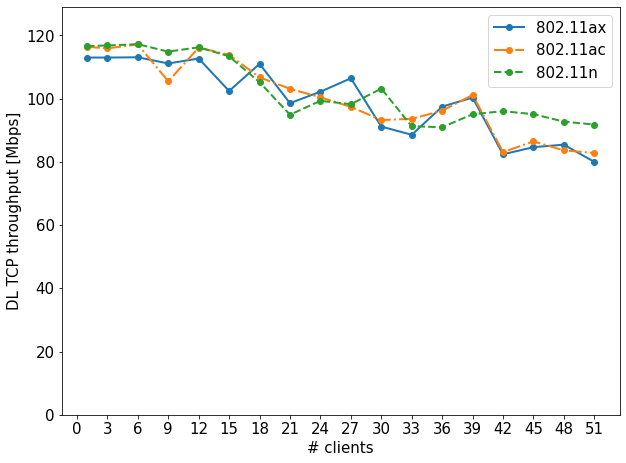

In [95]:
# LINE CHART
ymax = max(data.max()) + 0.1 * max(data.max())

plt.figure(figsize=(SMALL_SIZE,SMALL_SIZE * 0.75))
plt.plot(data['802.11ax'], '-o', linewidth=2)
plt.plot(data['802.11ac'], '-.o', linewidth=2)
plt.plot(data['802.11n'], '--o', linewidth=2)
plt.xticks(range(0,54, 3))
plt.ylim(0, ymax)
plt.xlabel("# clients")
plt.ylabel("DL TCP throughput [Mbps]")
plt.legend(['802.11ax', '802.11ac', '802.11n'])

### Charts for tests' results

In [96]:
# Upload and prepare data
df_aruba_win = pd.read_csv("results/tests/aruba-win.csv" ,delimiter=";")
df_cisco_ubu = pd.read_csv("results/tests/cisco-ubu.csv" ,delimiter=";")
df_cisco_win = pd.read_csv("results/tests/cisco-win.csv" ,delimiter=";")

#### PURE NETWORKS - Downlink tests

In [97]:
# Add 802.11ax Aruba Windows data
df_dl = df_aruba_win[['Downlink', 'Unnamed: 1']]
df_dl = df_dl.rename(columns = {'Downlink': '# STAS', 'Unnamed: 1': 'ax_aruba_win'}, inplace = False)
df_dl = df_dl[1:]
df_dl.reset_index(drop=True, inplace=True)
#print(df_dl)

In [98]:
# Add 802.11ax Cisco Catalyst Windows data
df_aux = df_cisco_win[['Downlink', 'Unnamed: 1']]
df_aux = df_aux.rename(columns = {'Downlink': '# STAS', 'Unnamed: 1': 'ax_cisco_win'}, inplace = False)
df_aux = df_aux[1:]
df_aux.reset_index(drop=True, inplace=True)
#print(df_aux)
df_dl = df_dl.merge(df_aux, on='# STAS', how='left')
#print(df_dl)

In [99]:
# Add 802.11ax Cisco Catalyst Ubuntu data
df_aux = df_cisco_ubu[['ax', 'Unnamed: 1']]
df_aux = df_aux.rename(columns = {'ax': '# STAS', 'Unnamed: 1': 'ax_cisco_ubu'}, inplace = False)
df_aux = df_aux[2:7]
df_aux.reset_index(drop=True, inplace=True)
#print(df_aux)
df_dl = df_dl.merge(df_aux, on='# STAS', how='left')
#print(df_dl)

In [100]:
# Add 802.11n Cisco Catalyst Ubuntu data
df_aux = df_cisco_ubu[['ax', 'Unnamed: 1']]
df_aux = df_aux.rename(columns = {'ax': '# STAS', 'Unnamed: 1': 'n_cisco_ubu'}, inplace = False)
df_aux = df_aux[10:15]
df_aux.reset_index(drop=True, inplace=True)
#print(df_aux)
df_dl = df_dl.merge(df_aux, on='# STAS', how='left')
df_dl = df_dl.astype("double").set_index(['# STAS'])
print(df_dl)

        ax_aruba_win  ax_cisco_win  ax_cisco_ubu  n_cisco_ubu
# STAS                                                       
1.0           221.00       107.000       134.000      138.000
6.0           211.30        94.500        83.010      121.000
12.0          208.70        46.710        43.610      121.310
18.0          179.20        18.747        29.418      118.598
24.0          143.57        22.680        17.436      113.430


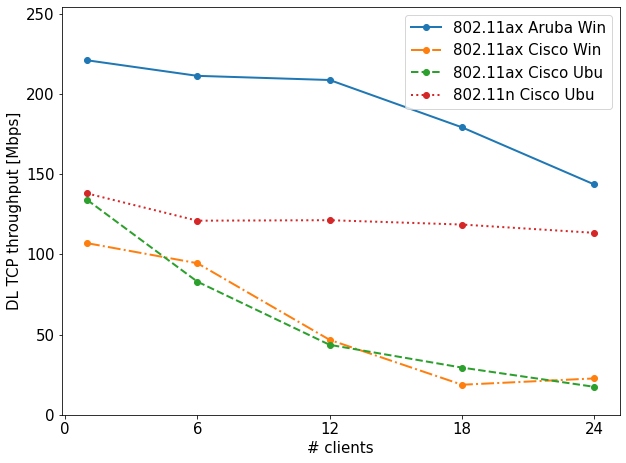

In [101]:
# LINE CHART
ymax = max(df_dl.max()) + 0.15 * max(df_dl.max())
plt.figure(figsize=(SMALL_SIZE,SMALL_SIZE * 0.75))
plt.plot(df_dl['ax_aruba_win'], '-o', linewidth=2)
plt.plot(df_dl['ax_cisco_win'], '-.o', linewidth=2)
plt.plot(df_dl['ax_cisco_ubu'], '--o', linewidth=2)
plt.plot(df_dl['n_cisco_ubu'], ':o', linewidth=2)
plt.ylim(0, ymax)
plt.xticks(range(0,27, 6))
plt.xlabel("# clients")
plt.ylabel("DL TCP throughput [Mbps]")
plt.legend(['802.11ax Aruba Win', '802.11ax Cisco Win', '802.11ax Cisco Ubu', '802.11n Cisco Ubu'])

#### PURE NETWORKS - Bidirectional tests

In [102]:
# Add 802.11ax Aruba Windows data
df_bidir = df_aruba_win[['Bidireccional', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]
df_bidir = df_bidir.rename(columns = {'Bidireccional': '# STAS', 
                                'Unnamed: 3': 'ax_aruba_win_dl',
                                'Unnamed: 4': 'ax_aruba_win_ul',
                                'Unnamed: 5': 'ax_aruba_win_agg'},
                     inplace = False)
df_bidir = df_bidir[1:]
df_bidir.reset_index(drop=True, inplace=True)
#print(df_bidir)

In [103]:
# Add 802.11ax Cisco Catalyst Windows data
df_aux = df_cisco_win[['Bidireccional', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]
df_aux = df_aux.rename(columns = {'Bidireccional': '# STAS', 
                                      'Unnamed: 3': 'ax_cisco_win_dl',
                                      'Unnamed: 4': 'ax_cisco_win_ul',
                                      'Unnamed: 5': 'ax_cisco_win_agg'},
                           inplace = False)
df_aux = df_aux[1:]
df_aux.reset_index(drop=True, inplace=True)
#print(df_aux)
df_bidir = df_bidir.merge(df_aux, on='# STAS', how='left')
#print(df_bidir)

In [104]:
# Add 802.11ax Cisco Catalyst Ubuntu data
df_aux = df_cisco_ubu[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]
df_aux = df_aux.rename(columns = {'Unnamed: 2': '# STAS', 
                                  'Unnamed: 3': 'ax_cisco_ubu_dl',
                                  'Unnamed: 4': 'ax_cisco_ubu_ul',
                                  'Unnamed: 5': 'ax_cisco_ubu_agg'},
                       inplace = False)
df_aux = df_aux[2:7]
df_aux.reset_index(drop=True, inplace=True)
#print(df_aux)
df_bidir = df_bidir.merge(df_aux, on='# STAS', how='left')
#print(df_bidir)

In [105]:
# Add 802.11n Cisco Catalyst Ubuntu data
df_aux = df_cisco_ubu[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]
df_aux = df_aux.rename(columns = {'Unnamed: 2': '# STAS', 
                                  'Unnamed: 3': 'n_cisco_ubu_dl',
                                  'Unnamed: 4': 'n_cisco_ubu_ul',
                                  'Unnamed: 5': 'n_cisco_ubu_agg'},
                       inplace = False)
df_aux = df_aux[10:15]
df_aux.reset_index(drop=True, inplace=True)
#print(df_aux)
df_bidir = df_bidir.merge(df_aux, on='# STAS', how='left')
df_bidir = df_bidir.astype("double").set_index(['# STAS'])
print(df_bidir)

        ax_aruba_win_dl  ax_aruba_win_ul  ax_aruba_win_agg  ax_cisco_win_dl  \
# STAS                                                                        
1.0              112.00           87.100           199.100           69.700   
6.0              140.00           35.680           175.680           79.410   
12.0             164.62           17.640           182.260           24.334   
18.0             135.41           19.709           155.119           15.955   
24.0              97.21           43.723           140.933           14.515   

        ax_cisco_win_ul  ax_cisco_win_agg  ax_cisco_ubu_dl  ax_cisco_ubu_ul  \
# STAS                                                                        
1.0             24.9000           94.6000           80.200           73.900   
6.0             26.0800          105.4900           40.920           69.070   
12.0            73.5190           97.8530           21.040           88.140   
18.0            31.6730           47.6280          

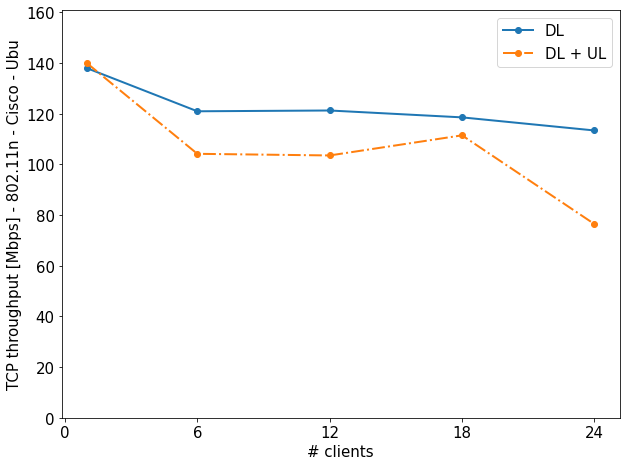

In [106]:
# LINE CHART
#ymax = max(df_bidir.max()) + 0.1 * max(df_bidir.max())
df_1 = df_dl[['n_cisco_ubu']]
df_2 = df_bidir[['n_cisco_ubu_agg']]
ymax = max(max(df_1.max()), max(df_2.max())) + 0.15 * max(max(df_1.max()), max(df_2.max()))

plt.figure(figsize=(SMALL_SIZE,SMALL_SIZE * 0.75))
plt.plot(df_dl['n_cisco_ubu'], '-o', linewidth=2)
plt.plot(df_bidir['n_cisco_ubu_agg'], '-.o', linewidth=2)
#plt.plot(df_bidir['ax_cisco_ubu_agg'], '--o', linewidth=2)
#plt.plot(df_bidir['n_cisco_ubu_agg'], ':o', linewidth=2)
plt.ylim(0, ymax)
plt.xticks(range(0,27, 6))
plt.xlabel("# clients")
plt.ylabel("TCP throughput [Mbps] - 802.11n - Cisco - Ubu")
#plt.legend(['802.11ax Aruba Win', '802.11ax Cisco Win', '802.11ax Cisco Ubu', '802.11n Cisco Ubu'])
plt.legend(['DL', 'DL + UL'])

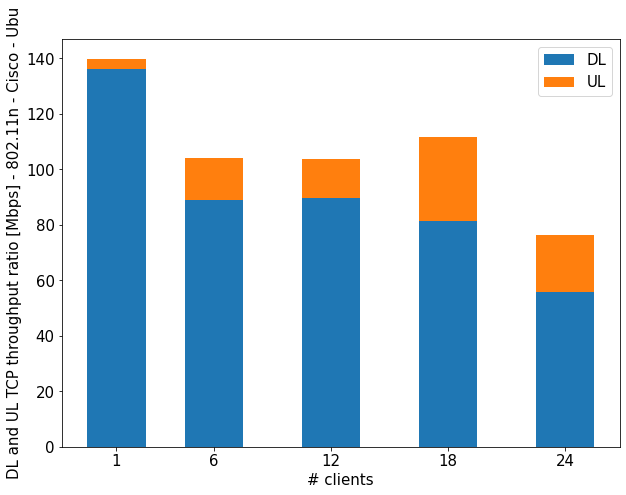

In [107]:
# STACKED BAR CHART
plt.figure(figsize=(SMALL_SIZE,SMALL_SIZE * 0.75))
plt.bar(df_bidir.index, df_bidir['n_cisco_ubu_dl'], WIDTH)
plt.bar(df_bidir.index, df_bidir['n_cisco_ubu_ul'], WIDTH, bottom=df_bidir['n_cisco_ubu_dl'])
plt.xticks([1, 6, 12, 18, 24])
plt.xlabel("# clients")
plt.ylabel("DL and UL TCP throughput ratio [Mbps] - 802.11n - Cisco - Ubu")
plt.legend(['DL', 'UL'])

#### MIXED NETWORKS - Downlink and Bidirectional tests

In [108]:
print(df_cisco_ubu)

               ax  Unnamed: 1     Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5
0        Downlink         NaN  Bidireccional        NaN        NaN        NaN
1        Clientes  Throughput       Clientes   Downlink     Uplink   Agregado
2               1         134              1       80.2       73.9      154.1
3               6       83.01              6      40.92      69.07     109.99
4              12       43.61             12      21.04      88.14     109.18
5              18      29.418             18      17.85     54.362     72.212
6              24      17.436             24     17.796     50.632     68.428
7               n         NaN            NaN        NaN        NaN        NaN
8        Downlink         NaN  Bidireccional        NaN        NaN        NaN
9        Clientes  Throughput       Clientes   Downlink     Uplink   Agregado
10              1         138              1        136       3.95     139.95
11              6         121              6       89.1      15.

In [109]:
# Add DL tests data
df_mix = df_cisco_ubu[['ax', 'Unnamed: 1']]
df_mix = df_mix.rename(columns = {'ax': '# STAS ax/n', 'Unnamed: 1': 'dl'}, inplace = False)
df_mix = df_mix[18:23]
df_mix.reset_index(drop=True, inplace=True)
print(df_mix)

  # STAS ax/n       dl
0      0 - 24   113.43
1      6 - 18   63.302
2     12 - 12   56.283
3      18 - 6  29.2305
4      24 - 0   17.436


In [110]:
# Add DL + UL tests data
df_aux = df_cisco_ubu[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]
df_aux = df_aux.rename(columns = {'Unnamed: 2': '# STAS ax/n', 
                                  'Unnamed: 3': 'dlul_dl',
                                  'Unnamed: 4': 'dlul_ul',
                                  'Unnamed: 5': 'dlul_agg'},
                       inplace = False)
df_aux = df_aux[18:23]
df_aux.reset_index(drop=True, inplace=True)
print(df_aux)
df_mix = df_mix.merge(df_aux, on='# STAS ax/n', how='left')
df_mix = df_mix.set_index(['# STAS ax/n'])
df_mix = df_mix.astype("double")
print(df_mix)

  # STAS ax/n   dlul_dl  dlul_ul  dlul_agg
0      0 - 24   55.8747   20.624   76.4987
1      6 - 18   42.1179   14.544   56.6619
2     12 - 12  31.25834  33.7999  65.05824
3      18 - 6   11.5331  50.0481   61.5812
4      24 - 0    17.796   50.632    68.428
                   dl   dlul_dl  dlul_ul  dlul_agg
# STAS ax/n                                       
0 - 24       113.4300  55.87470  20.6240  76.49870
6 - 18        63.3020  42.11790  14.5440  56.66190
12 - 12       56.2830  31.25834  33.7999  65.05824
18 - 6        29.2305  11.53310  50.0481  61.58120
24 - 0        17.4360  17.79600  50.6320  68.42800


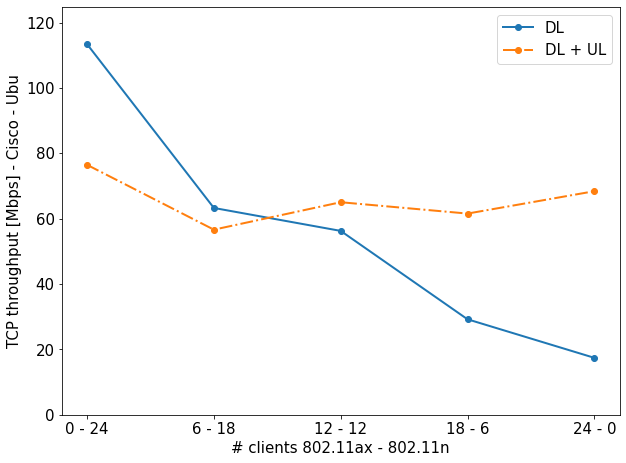

In [111]:
# LINE CHART
ymax = max(df_mix.max()) + 0.1 * max(df_mix.max())
plt.figure(figsize=(SMALL_SIZE,SMALL_SIZE * 0.75))
plt.plot(df_mix['dl'], '-o', linewidth=2)
plt.plot(df_mix['dlul_agg'], '-.o', linewidth=2)
plt.ylim(0, ymax)
#plt.xticks(range(0,27, 6))
plt.xlabel("# clients 802.11ax - 802.11n")
plt.ylabel("TCP throughput [Mbps] - Cisco - Ubu")
plt.legend(['DL', 'DL + UL'])

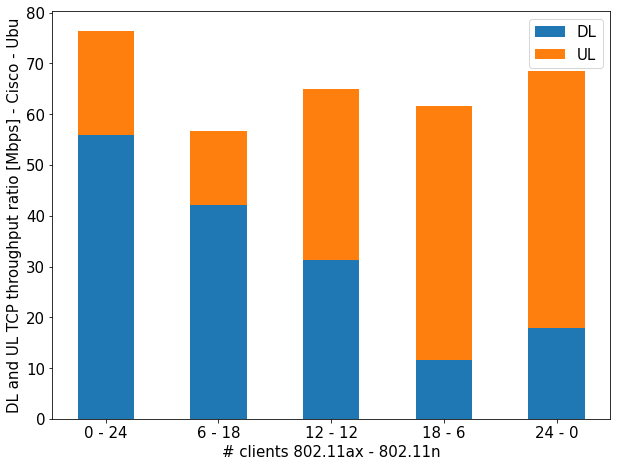

In [119]:
# STACKED BAR CHART
plt.figure(figsize=(SMALL_SIZE,SMALL_SIZE * 0.75))
plt.bar(df_mix.index, df_mix['dlul_dl'], WIDTH_2)
plt.bar(df_mix.index, df_mix['dlul_ul'], WIDTH_2, bottom=df_mix['dlul_dl'])
#plt.xticks([1, 6, 12, 18, 24])
plt.xlabel("# clients 802.11ax - 802.11n")
plt.ylabel("DL and UL TCP throughput ratio [Mbps] - Cisco - Ubu")
plt.legend(['DL', 'UL'])